
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the Dow Jones Industrial Average.  Construct portfolios from the 30 stocks in the DJIA and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,169.46,21.25,8.83,-7.43,5.26,20.91,10.25,23.07,-7.43,-171.41
1,AXP,American Express,US Stocks:Financials,2168.10,99.36,7.60,9.94,14.02,80.05,17.11,29.07,9.94,0.34
2,AMGN,Amgen,US Stocks:Healthcare,2.30,-25.51,0.91,11.82,11.26,20.19,10.43,23.89,11.82,0.49
3,AAPL,Apple Inc.,US Stocks:Technology,113.73,5.06,87.24,44.50,35.80,23.10,12.34,33.28,44.50,1.34
4,BA,Boeing,US Stocks:Industrials,16974.93,242.58,-32.28,-4.23,12.43,71.48,20.91,50.67,-4.23,-214.33
5,CAT,Caterpillar Inc.,US Stocks:Industrials,584.16,134.27,33.07,11.72,25.23,28.04,7.96,26.53,11.72,0.44
6,CVX,Chevron Corporation,US Stocks:Energy,2668.68,78.14,-15.27,-4.12,5.42,62.94,21.66,32.62,-4.12,-134.39
7,CSCO,Cisco Systems,US Stocks:Technology,920.35,44.95,5.48,8.84,14.10,29.38,8.58,26.92,8.84,0.33
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,226.99,32.03,2.77,8.74,8.36,27.69,8.75,17.76,8.74,0.49
9,GS,Goldman Sachs,US Stocks:Financials,959.68,70.06,12.99,0.42,7.11,31.69,9.14,32.26,0.42,0.01


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
18,MSFT,Microsoft,US Stocks:Technology,-7.85,1.26,44.49,40.24,34.08,20.69,14.14,19.10,40.24,2.11
19,NKE,Nike,US Stocks:Consumer Discretionary,150.48,123.73,44.58,33.05,17.77,11.91,5.41,23.92,33.05,1.38
3,AAPL,Apple Inc.,US Stocks:Technology,113.73,5.06,87.24,44.50,35.80,23.10,12.34,33.28,44.50,1.34
25,V,Visa Inc.,US Stocks:Financials,207.43,17.32,17.65,26.37,23.00,30.16,9.87,21.79,26.37,1.21
20,PG,Procter & Gamble,US Stocks:Consumer Staples,-23.93,0.79,13.04,17.93,16.09,17.95,13.52,16.43,17.93,1.09
27,WMT,Walmart,US Stocks:Consumer Discretionary,77.46,18.15,27.12,17.96,23.14,18.24,9.85,18.16,17.96,0.99
17,MRK,Merck & Co.,US Stocks:Healthcare,21.52,-12.10,-4.84,16.79,12.63,13.62,7.66,17.25,16.79,0.97
21,CRM,Salesforce,US Stocks:Technology,-71.46,-38.16,42.75,31.27,23.09,44.18,35.85,32.79,31.27,0.95
23,UNH,UnitedHealth Group,US Stocks:Healthcare,-10.95,63.11,26.60,18.30,26.91,18.59,12.05,23.55,18.30,0.78
24,VZ,Verizon,US Stocks:Communication Services,139.97,11.91,5.63,10.69,11.52,12.49,2.99,15.92,10.69,0.67


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,NKE,AAPL,V,PG,WMT,MRK,CRM,UNH,VZ,...,HON,MCD,AMGN,KO,DIS,CAT,AXP,CSCO,INTC,Ranked Portfolio
Annual Returns,40.24,33.05,44.50,26.37,17.93,17.96,16.79,31.27,18.30,10.69,...,15.42,9.95,11.82,8.74,13.17,11.72,9.94,8.84,7.96,18.50
Std Dev,19.10,23.92,33.28,21.79,16.43,18.16,17.25,32.79,23.55,15.92,...,24.55,19.25,23.89,17.76,29.41,26.53,29.07,26.92,27.00,21.93
Sharpe Ratio,2.11,1.38,1.34,1.21,1.09,0.99,0.97,0.95,0.78,0.67,...,0.63,0.52,0.49,0.49,0.45,0.44,0.34,0.33,0.29,0.84
Weight,0.06,0.07,0.06,0.02,0.05,0.07,0.06,0.06,0.06,0.00,...,0.04,0.05,0.06,0.05,0.00,0.04,0.02,0.06,0.06,1.00
Worst Typical Down Year,2.04,-14.79,-22.06,-17.21,-14.93,-18.36,-17.71,-34.31,-28.80,-21.15,...,-33.68,-28.55,-35.96,-26.78,-45.65,-41.34,-48.20,-45.00,-46.04,-25.36
Black Swan,-17.06,-38.71,-55.34,-39.00,-31.36,-36.52,-34.96,-67.10,-52.35,-37.07,...,-58.23,-47.80,-59.85,-44.54,-75.06,-67.87,-77.27,-71.92,-73.04,-47.29


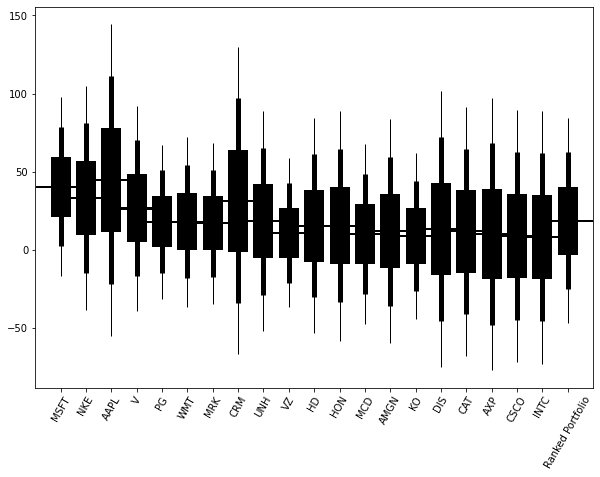

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

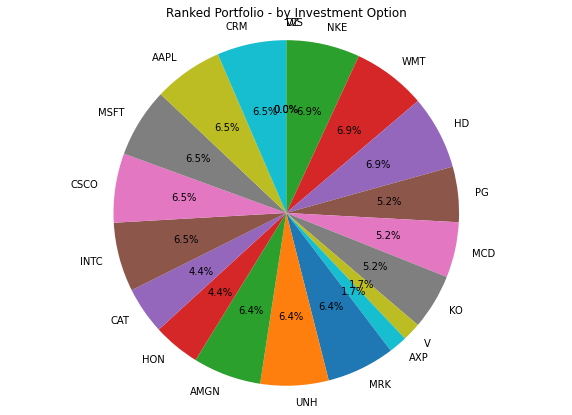

DIS    0.02
VZ     0.06
NKE    0.06
WMT    0.04
HD     0.06
PG     0.05
MCD    0.07
KO     0.04
V      0.06
AXP    0.05
MRK    0.06
UNH    0.06
AMGN   0.07
HON    0.05
CAT    0.06
INTC   0.06
CSCO   0.00
MSFT   0.02
AAPL   0.07
CRM    0.00



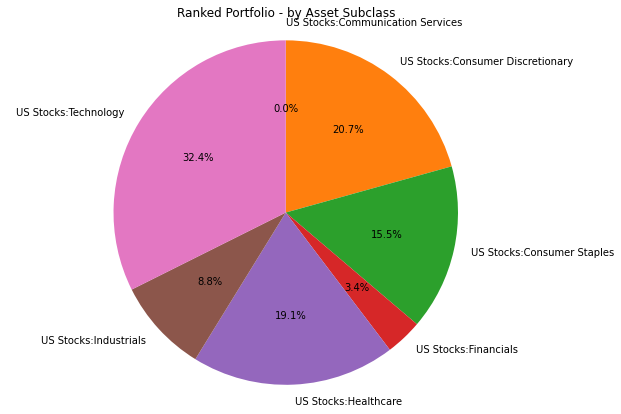

US Stocks:Communication Services   0.00
US Stocks:Consumer Discretionary   0.21
US Stocks:Consumer Staples         0.16
US Stocks:Financials               0.03
US Stocks:Healthcare               0.19
US Stocks:Industrials              0.09
US Stocks:Technology               0.32



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.0648
    NKE                            0.0689
    AAPL                           0.0648
    V                              0.0172
    PG                             0.0518
    WMT                            0.0689
    MRK                            0.0637
    CRM                            0.0648
    UNH                            0.0637
    VZ                             0.0000
    HD                             0.0689
    HON                            0.0441
    MCD                            0.0518
    AMGN                           0.0637
    KO                             0.0518
    DIS                            0.0000
    CAT                            0.0441
    AXP                            0.0172
    CSCO                           0.0648
    INTC                           0.0648


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.12
    annual_return              22.88
    std_dev                    20.48
    worst typical down year   -18.08
    black_swan                -38.56


Ranked Portfolio Weights:
    MSFT                           0.1000
    NKE                            0.1000
    AAPL                           0.0700
    V                              0.0600
    PG                             0.0900
    WMT                            0.1600
    MRK                            0.0300
    CRM                            0.0600
    UNH                            0.0400
    VZ                             0.1200
    HD                             0.0500
    HON                            0.0000
    MCD                            0.0000
    AMGN                           0.0300
    KO                             0.0300
    DIS                            0.0000
    CAT                            0.0300
    AXP       

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).